In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pca import pca
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
# for testing different models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, ShuffleSplit
#

# Ensemble
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

# DS3 Supervised learning - Final Assignment

## Background

The selected dataset is a [divorce predictor data set](http://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#) that was used to construct a neural network used to predict whether a divorce would happen ([See article](https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416)). A questionnaire containing 54 questions was filled in by 170 participants, wheras 84 (49%) were divorced and 86 (51%) were married couples. Using this data a model will be generated that can predict the chances of divorce.

## Data exploration

In [2]:
# data from http://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set#
# read in the data
df = pd.read_csv('data/divorce.csv', sep=';')
print(df.shape)  # print data shape
df.head()  # print first five rows

(170, 55)


,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


There are 170 samples, where each sample has 54 features. This is a rather large number and preferably should become smaller if possible.

In [3]:
# describe the dataset
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


As previously stated, there are 54 questions and according to the above table the answers seem to be answered on a scale from 0-4. The final column (class) holds only 1's and 0's and tell whether a divorce happened or not. Thus, there is no need to normalize this data as it all in in the same range and the final column is only a label.

In [4]:
# There do not seem to be any missing values in the data
df.isna().sum().sum()

0

To view the distribution of the answers, a histograms and boxplots were generated in the next steps.

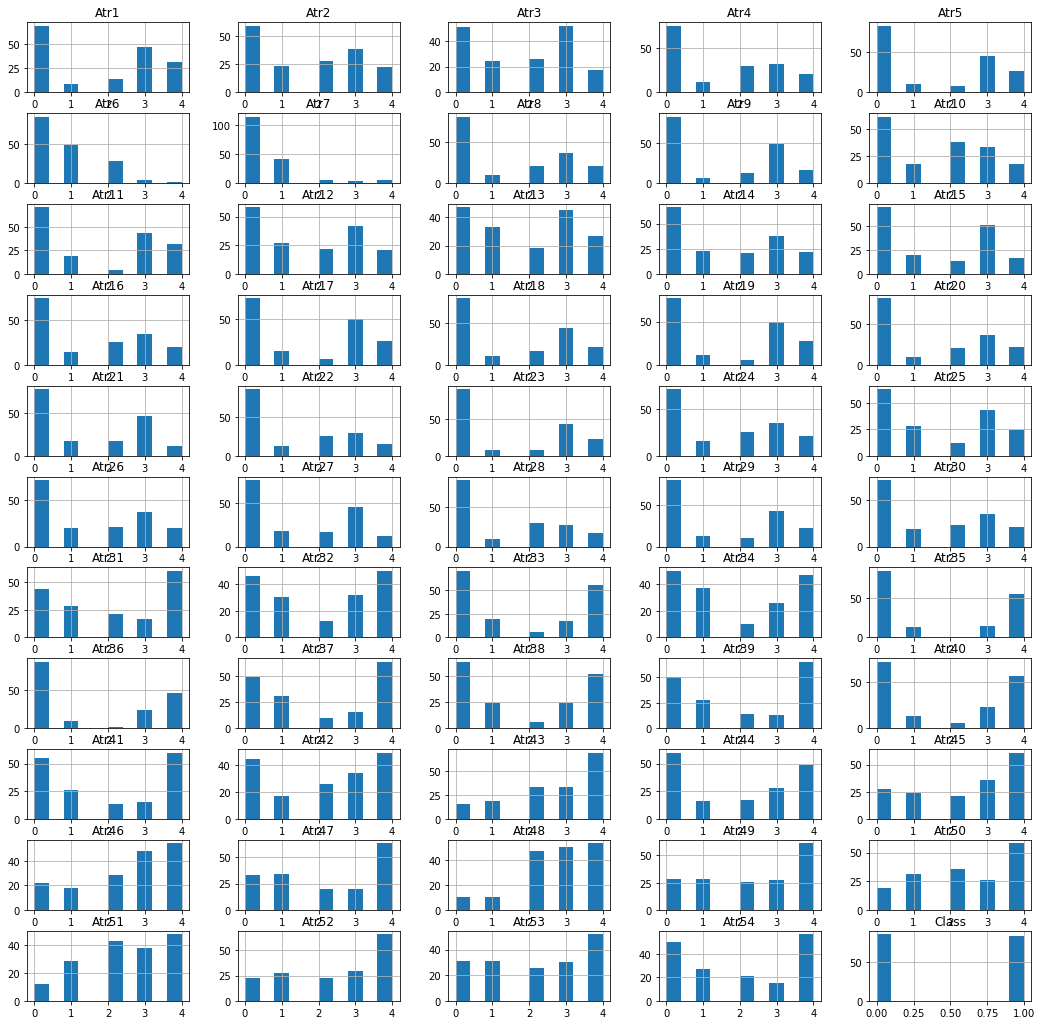

In [5]:
# To view the distribution of the data, for each question a histogram is generated
fig, axis = plt.subplots(11,5,figsize=(18, 18))
df.hist(ax=axis)
plt.show()

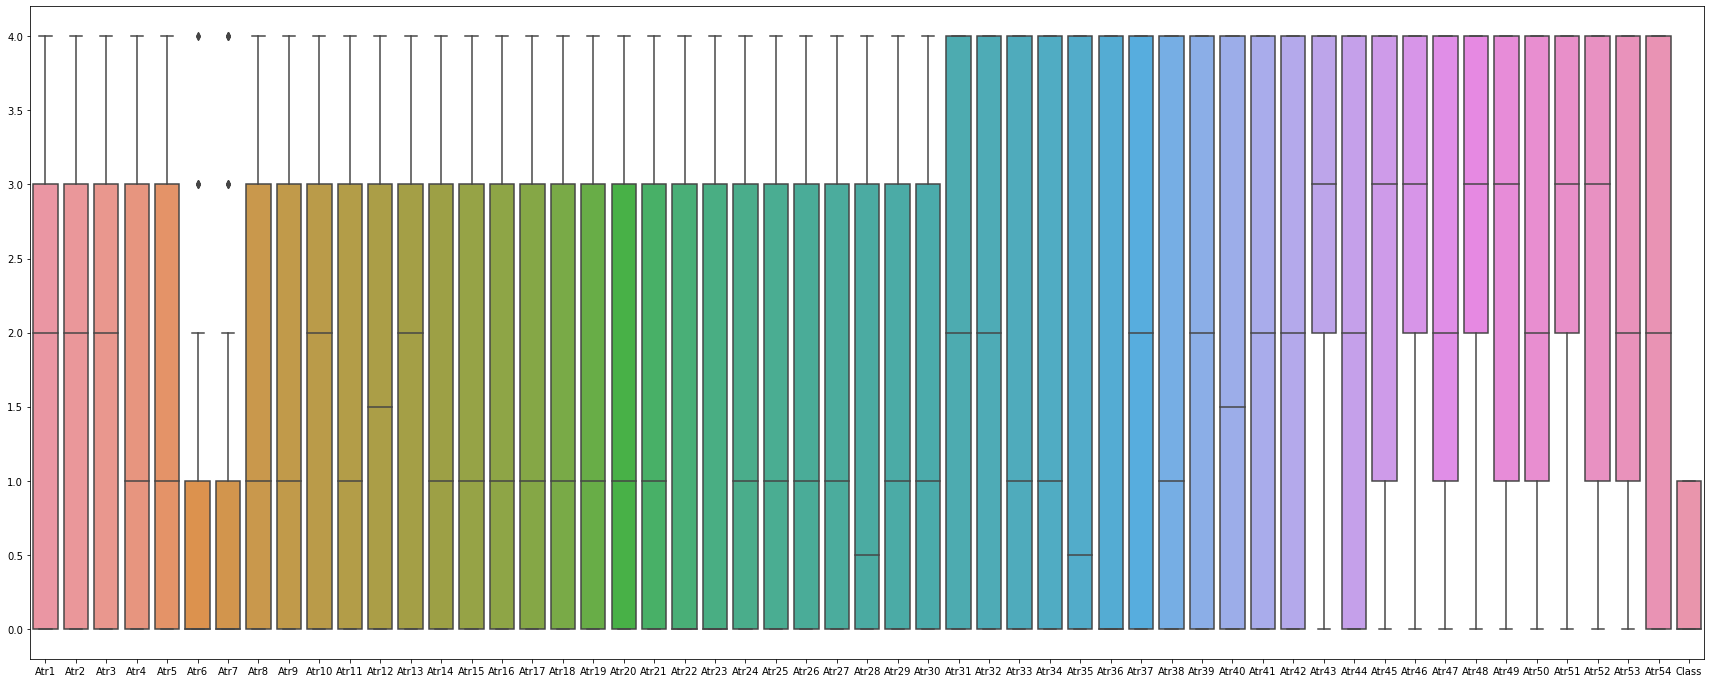

In [6]:
plt.figure(figsize=(30,12))
sns.boxplot(data=df)
plt.show()

According to the above plots, nothing in particular stands out. The data seems to be distributed randomly. Additionally, considering the number of features, it is very difficult to say anything about this data.

## Cleaning the data

According to the paper which used this data, divorce was explained in large part by 6 features. Thus, to reduce dimensionality a PCA will be performed to determine the most important features. This subselection will be then used to train the model.

In [7]:
# We do not need the labels (Divorce, no divorce)
df_unlabeled = df.drop('Class', axis=1)
# Save divorce labels in a different variable
divorce_label = df['Class']

In [8]:
# Creating model which considers 6 components, no normalization necessary due to data being in the same scale.
model = pca(n_components=5, normalize=False)
results = model.fit_transform(df_unlabeled)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [54] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


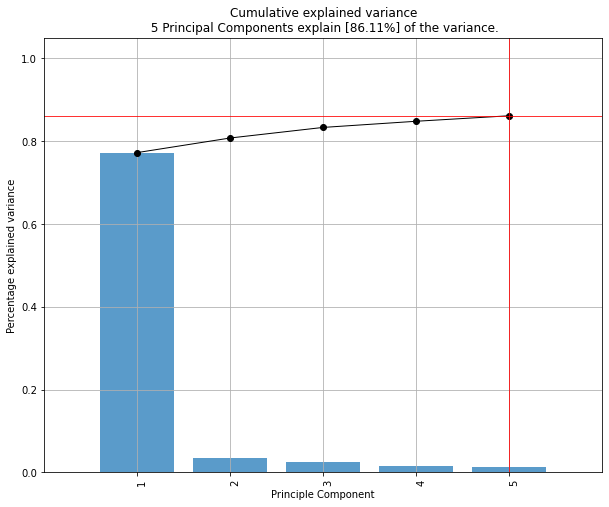

<Figure size 432x288 with 0 Axes>

In [9]:
# Plot the model to see how much is explained by how many principal components
model.plot(figsize=(10,8))
plt.show()

The above plot suggests a single component already seems to be sufficient to explain about 80% of all data. With 5 components, circa 86% of the variance in the dataset is explained. For further insight a biplot will be generated to observe the most important features. The paper claims that the divorces are mainly explained by 6 features, thus we'll use this value.

[pca] >Plot PC1 vs PC2 with loadings.


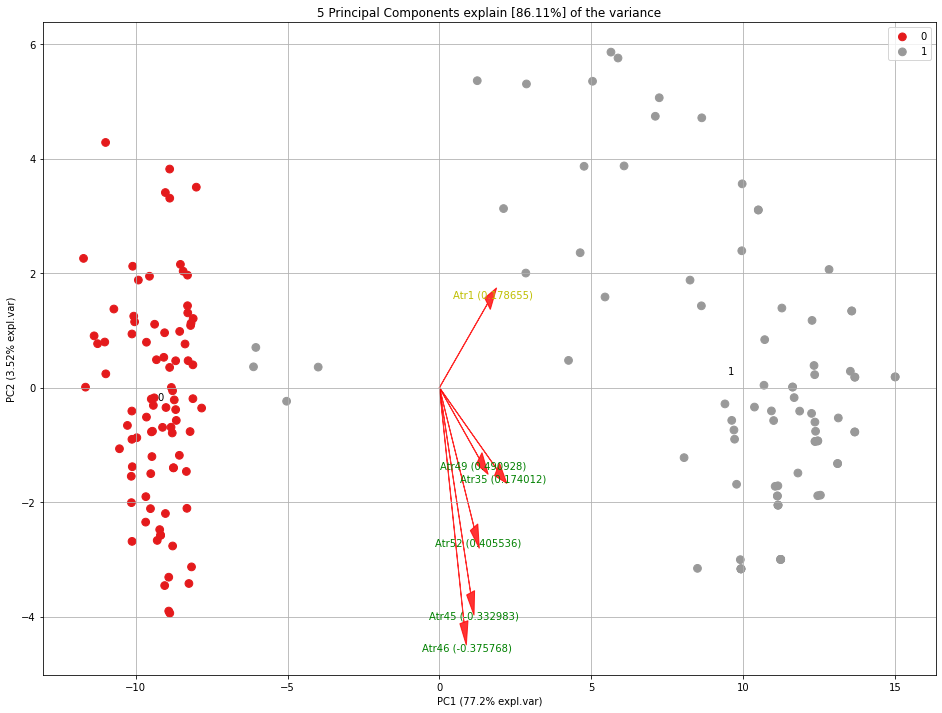

In [10]:
# show the top 6 features in a biplot
model.biplot(n_feat=6,  legend=True, figsize=(16,12), y=divorce_label, label=True)
plt.show()

According to the biplot, the main features to responsible for a couple having a divorce or not seem to be: 'Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52'.

Both groups seem to be split very well along PC1 with a few outliers closer to the non-divorced group. There also seems to be a little more variation within the divorced group than the non-divorced group.

In [11]:
# In the selection we include the 6 features and the labels
df_select = df[['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52', 'Class']]
df_select.head()

,Atr1,Atr35,Atr45,Atr46,Atr49,Atr52,Class
0,2,0,3,2,3,3,1
1,4,0,2,2,4,4,1
2,2,1,2,3,1,2,1
3,3,1,3,2,3,2,1
4,2,0,2,2,3,2,1


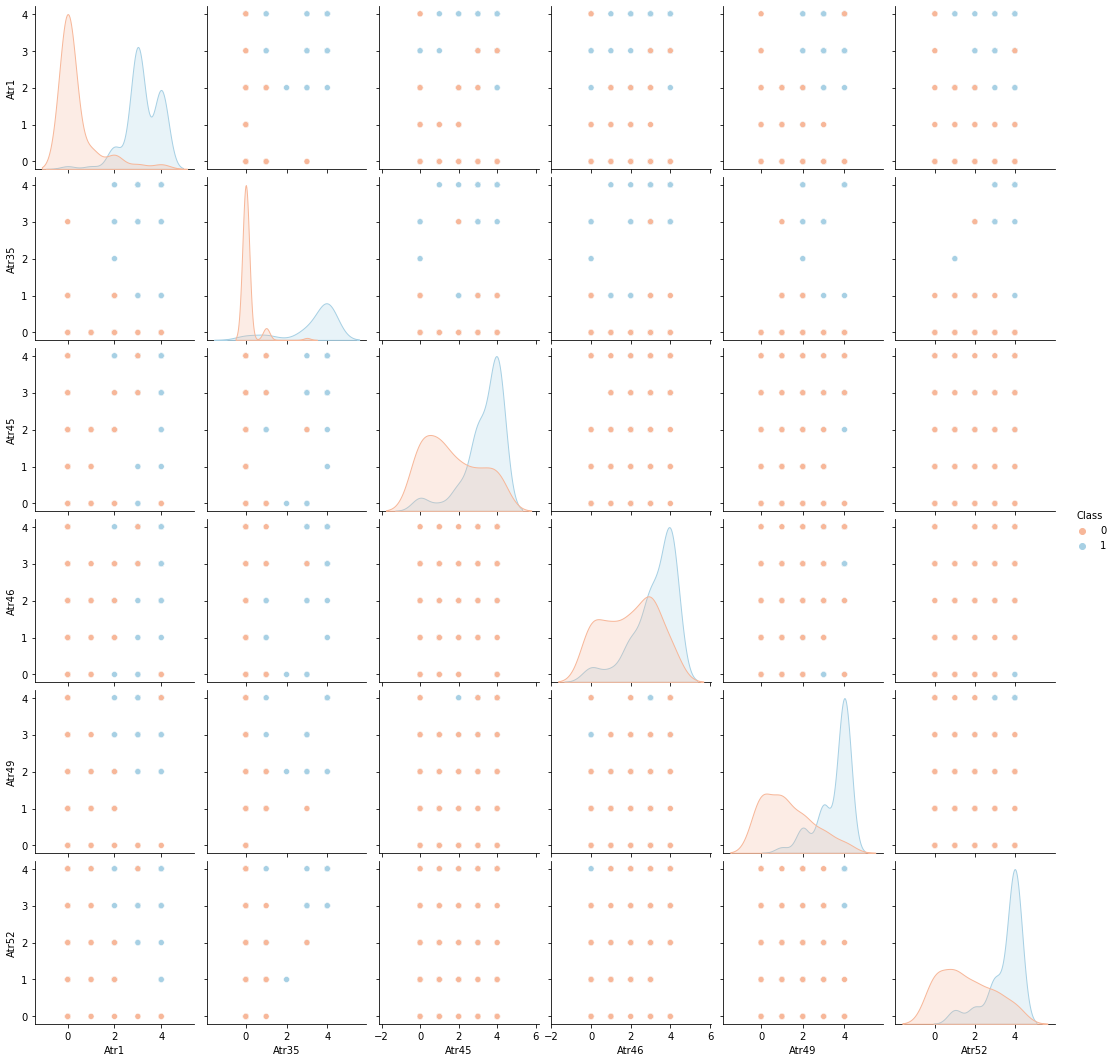

In [12]:
# To view the distribution of this selection, a pairplot is generated
sns.pairplot(data=df_select, hue='Class', palette='RdBu')

For most of the features, there seems to be a clear distinction between both groups with some overlay.

## Creating a model

In [13]:
cols = ['Atr1', 'Atr35', 'Atr45', 'Atr46', 'Atr49', 'Atr52']  # column selection
y = np.array(df['Class'])  # Store outcome in an array
X = np.array(df[cols])  # Store selected columns in an array
print(X.shape)  # print the shape

(170, 6)


In [14]:
# Split the data in train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
# Train the model using Logistic regression
logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)

In [16]:
# Evaluate the trained model using the test data.
y_pred = logreg.predict(X_test)
confusion_m = confusion_matrix(y_test, y_pred)
# print the confusion matrix to view how correct the model works.
print ('=== [confusion matrix] ==='.center(54))
print(confusion_m)
print ('')
print ('=== [classification report] ==='.center(54))
print(classification_report(y_test, y_pred))

              === [confusion matrix] ===              
[[25  0]
 [ 1 25]]

           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



In [17]:
# Print the coefficient for the model
print('Coefficients', logreg.coef_)
# print the mean squared error to see how correct the model is.
print('MSE: ', mean_squared_error(y_test, y_pred, squared=False))

Coefficients [[ 1.00964189  1.29357997  0.1958408  -0.19280001  0.7323557   0.44792087]]
MSE:  0.14002800840280097


## Testing different models
### Necessary functions

In [18]:
def evaluate(y_test, y_pred, X_test, clf):
    print ('=== [confusion matrix] ==='.center(54))
    print(confusion_matrix(y_test, y_pred))
    print ('')
    print ('=== [classification report] ==='.center(54))
    print(classification_report(y_test, y_pred))
    
      
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')
    return model.score(X_val, y_val), model.score(X_train, y_train)

In [19]:
#split
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

#cross validation
cv = ShuffleSplit(n_splits=100, test_size=test_size, random_state=42)

### Logistic Regression

In [20]:
# training
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [21]:
# evaluation
y_pred = lg.predict(X_test)
evaluate(y_test, y_pred, X_test, lg)

              === [confusion matrix] ===              
[[21  2]
 [ 4 24]]

           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.92      0.86      0.89        28

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.89      0.88      0.88        51



test  acc: 0.8823529411764706
train acc: 0.9915966386554622


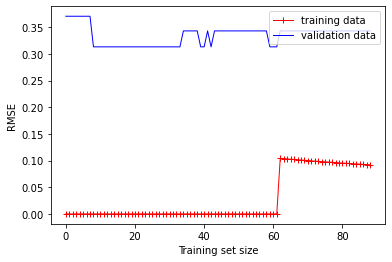

In [24]:
test_logistic, train_logistic = plot_learning_curves(lg, X_train, y_train, X_test, y_test)

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)
evaluate(y_test, y_pred, X_test, dt)
plot_learning_curves(dt, X_train, y_train, X_test, y_test)

### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)
evaluate(y_test, y_pred, X_test, svm)
plot_learning_curves(svm, X_train, y_train, X_test, y_test)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
y_pred = gnb.predict(X_test)
evaluate(y_test, y_pred, X_test, gnb)
plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

## Ensemble learning
### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)
evaluate(y_test, y_pred, X_test, rf)
plot_learning_curves(rf, X_train, y_train, X_test, y_test)

### Bagging with Decision Tree classifier

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_features = 1.0, max_samples = 0.5) 
bg.fit(X_train, y_train)

In [ ]:
y_pred = bg.predict(X_test)
evaluate(y_test, y_pred, X_test, bg)
plot_learning_curves(bg, X_train, y_train, X_test, y_test)